In [4]:
# conda activate dl

# manipulation
import pandas as pd
import numpy as np
import os

# dim redo
from sklearn.decomposition import PCA

# viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
! pwd 

/home/gama/bla_analysis/notebooks


This notebook shows the procedure of dim redo using PCA, tSNE and UMAP

# load data source

In [2]:
def do_iscatter(df, x, y, annot):
    
    """
    do a scatterplot given a df and hue
    """
   
    # plot
    fig = px.scatter(
    df, x = x, y = y,
    height = 800, width = 900, color = annot,
    hover_name = "protein_name", 
    color_discrete_sequence = px.colors.qualitative.Plotly,
    hover_data = [
        "#name", "protein_family_header", "length", 'protein_family',"protein_family_header", 'bla_class'])

    fig.update_traces(marker=dict(size=8, line=dict(width=1,color='black')),selector=dict(mode='markers'))
    fig.update_layout(template="plotly_white")
    #fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey',mirror=True)
    #fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey', mirror=True)
    fig.update_yaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.show()

In [3]:
#load data 
df_plm = pd.read_pickle("../results/embeddings/all_plm.pkl")
df_plm.pop("seq")
df_annot = pd.read_csv("../results/tables/df_annot_all.csv", sep = "\t")
df = pd.merge(df_annot, df_plm, on = "seq_id", how = "left")

# remove LRA-5 and varG
df = df.iloc[:-1 , :]
df = df[df.bla_class.str.contains("Class A|Class B|Class C|Class D|Consensus|Ancestral|Risso")]
df

,#name,seq,length,filename,protein_name,protein_family,bla_class,bla_subclass,protein_family_header,seq_id,...,seq_without_sigpept,esm1b,esm,onehot,t5xlu50,t5bfd,xlnet,bepler,carp640M,carp640M_logp
0,gi|5596421|emb|CAB51471.1|ACI-1| class A exten...,MKKFCFLFLIICGLMVFCLQDCQARQKLNLADLENKYNAVIGVYAV...,284,A-ACI-1-prot.fasta,ACI-1,ACI,Class A,Class A,ACI,seq_0,...,CQARQKLNLADLENKYNAVIGVYAVDMENGKKICYKPDTRFSYCST...,"[0.1102982, 0.014699467, -0.14032564, 0.258299...","[-1.9012868, 0.22372644, 0.21296117, -0.166722...","[0.08450704, 0.024647888, 0.08450704, 0.045774...","[0.008956722, 0.02665889, 0.02402008, 0.014990...","[0.023663048, -0.0007369746, -0.0076412507, 0....","[-0.19811592, 0.051563144, -0.005958873, 0.039...","[0.08450704, 0.045774646, 0.07042254, 0.084507...","[8.911173, 9.043713, 2.4614172, 12.103228, -8....",-0.294909
1,AHN92697.1|ACI-2| beta-lactamase [uncultured b...,MKKFCFLFLIICGLMFFCLQDCQARQKLNLADLENKYNAVIGVYAV...,284,A-ACI-2-prot.fasta,ACI-2,ACI,Class A,Class A,ACI,seq_1,...,CQARQKLNLADLENKYNAVIGVYAVDMENGKKICYKPDTRFSYCST...,"[0.10703633, 0.017742604, -0.14941521, 0.25984...","[-1.91362, 0.15840982, 0.18624821, -0.169153, ...","[0.08098592, 0.024647888, 0.08450704, 0.042253...","[0.0076766736, 0.027014462, 0.027420135, 0.013...","[0.026570462, 0.0026666287, -0.006873358, -0.0...","[-0.21204372, 0.057212643, -0.011840693, 0.035...","[0.08098592, 0.045774646, 0.07042254, 0.084507...","[8.887652, 9.320681, 2.41787, 12.194232, -8.64...",-0.292038
2,EHO64028.1|ACI-3| hypothetical protein HMPREF9...,MKKFCFLFLIICGLMVFSLQDCQARQKLNLADLENKYNAVIGVYAV...,284,A-ACI-3-prot.fasta,ACI-3,ACI,Class A,Class A,ACI,seq_2,...,CQARQKLNLADLENKYNAVIGVYAVDMENGKKICYKPDTRFSYCST...,"[0.10849612, 0.017496616, -0.14619425, 0.26836...","[-1.8146169, 0.20834586, 0.23776329, -0.163906...","[0.08450704, 0.02112676, 0.08450704, 0.0457746...","[0.009324158, 0.02478514, 0.022525383, 0.01392...","[0.02341963, -0.004910054, -0.008731285, 0.005...","[-0.1872002, 0.043762427, -0.03699141, 0.03243...","[0.08450704, 0.045774646, 0.07042254, 0.084507...","[8.827172, 8.74543, 2.4937172, 12.3279085, -8....",-0.287659
3,AHN92696.1|ACI-4| beta-lactamase [uncultured b...,MKKFCFLFLIICGLMVFCLQGCQARQKLNLADLENKYNAVIGVYAV...,284,A-ACI-4-prot.fasta,ACI-4,ACI,Class A,Class A,ACI,seq_3,...,CQARQKLNLADLENKYNAVIGVYAVDMENGKKICYKPDTRFSYCST...,"[0.12845756, 0.017484514, -0.13535379, 0.24379...","[-1.8452643, 0.23816845, 0.23408653, -0.152660...","[0.08450704, 0.024647888, 0.08098592, 0.045774...","[0.004128871, 0.033653855, 0.028860169, 0.0124...","[0.014434682, -0.0026827375, -0.003042692, 0.0...","[-0.2078117, 0.05418699, 0.0056420905, 0.02040...","[0.08450704, 0.045774646, 0.07042254, 0.080985...","[8.501886, 9.030052, 2.3223486, 11.952613, -9....",-0.289380
4,AMP55835.1|ACI-5| classA [uncultured bacterium],MKKFCFLFLIICGLMVFCLQDCQARQKLNLADLENKYNAVIGVYAV...,284,A-ACI-5-prot.fasta,ACI-5,ACI,Class A,Class A,ACI,seq_4,...,CQARQKLNLADLENKYNAVIGVYAVDMENGKKICYKPDTRFSYCST...,"[0.10706033, 0.013306678, -0.14212927, 0.25449...","[-1.8473366, 0.2200377, 0.23291773, -0.1457919...","[0.08450704, 0.024647888, 0.08450704, 0.045774...","[0.0077304444, 0.029016294, 0.023319585, 0.014...","[0.020652149, -0.00015262279, -0.0065017454, 0...","[-0.19173458, 0.04517981, -0.0330168, 0.023556...","[0.08450704, 0.045774646, 0.07042254, 0.084507...","[8.907578, 8.904117, 2.4000638, 12.001774, -9....",-0.287441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25816,ENCA,MHPQTLEQIKESESQLSGRVGMVELDLASGRTLSYRADERFPMMST...,263,ENCA,ENCA,Ancestral,Ancestral,Ancestral,Ancestral,seq_25816,...,MHPQTLEQIKESESQLSGRVGMVELDLASGRTLSYRADERFPMMST...,"[0.06821247, -0.008263558, -0.035088044, 0.155...","[-1.3510801, -0.12951511, 0.31293106, -0.54279...","[0.121673, 0.0076045627, 0.05703422, 0.0722433...","[0.036983196, 0.084664896, 0.03534185, 0.05482...","[0.042047616, 0.01768007, -0.008149116, 0.0520...","[-0.43289712, 0.292488, -0.044813067, -0.41627...","[0.121673, 0.072243

In [4]:
df.columns

Index(['#name', 'seq', 'length', 'filename', 'protein_name', 'protein_family',
       'bla_class', 'bla_subclass', 'protein_family_header', 'seq_id',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept', 'esm1b', 'esm', 'onehot', 't5xlu50', 't5bfd',
       'xlnet', 'bepler', 'carp640M', 'carp640M_logp'],
      dtype='object')

In [5]:
# reanme onehot col as aa_composition 
df = df.rename(columns={'onehot': 'aa_composition'})
df.columns

Index(['#name', 'seq', 'length', 'filename', 'protein_name', 'protein_family',
       'bla_class', 'bla_subclass', 'protein_family_header', 'seq_id',
       'molecular_weight', 'aromaticity', 'instability', 'gravy',
       'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet',
       'is_clust90_rep', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'predicted_signal_peptide',
       'Other_sigpept', 'SP(Sec/SPI)', 'LIPO(Sec/SPII)', 'TAT(Tat/SPI)',
       'TATLIPO(Sec/SPII)', 'PILIN(Sec/SPIII)', 'CS Position',
       'seq_without_sigpept', 'esm1b', 'esm', 'aa_composition', 't5xlu50',
       't5bfd', 'xlnet', 'bepler', 'carp640M', 'carp640M_logp'],
      dtype='object')

In [6]:
models = ['esm1b', 'esm', 'aa_composition', 't5xlu50', 't5bfd', 'xlnet', 'bepler', 'carp640M']

In [7]:
# df of serin betalactamases
df_sbl = df[~df.bla_class.str.contains("Class B|Consensus")]

# df of metalobetalactamases
df_mbl = df[df.bla_class.str.contains("Class B")]

# consensus
df_cons   = df[df.bla_class.str.contains("Consensus")]
df_cons_sbl = df_cons[~df_cons.protein_name.str.contains("class_b")]
df_cons_mbl = df_cons[df_cons.protein_name.str.contains("class_b")]

# concat data
df_sbl = pd.concat([df_cons_sbl, df_sbl])
df_mbl = pd.concat([df_cons_mbl, df_mbl])

# reset idx
df_sbl = df_sbl.reset_index(drop=True)
df_mbl = df_mbl.reset_index(drop=True)

In [8]:
# create dirs to save data
! tree -L 1 ../results/dim_redo/splitted_classes

../results/dim_redo/splitted_classes
├── pca
├── tsne
└── umap

3 directories, 0 files


# PCA 

In [9]:
def do_pca(model, df, title):
    
    """
    A quick function to do a PCA given a protein language model and data
    """
    
    # set names
    dim1 = "PC1_" + model
    dim2 = "PC2_" + model
    path = "../results/dim_redo/splitted_classes/pca/" + "pca_2d_" + title + "_" + model + ".csv"
    
    # compute pca and concat data
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df[model].to_list())
    df_pca = pd.DataFrame(principal_components, columns = [dim1, dim2])
    df_pca = pd.concat([df_pca, df[["bla_subclass", "seq_id"]]], axis = 1)
    
    # plot 
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data = df_pca, x = dim1, y = dim2, hue = "bla_subclass", alpha = 0.8)
    exp_var = np.round(pca.explained_variance_ratio_, 2)
    plt.title(f" {title} | {model} \n Explained variance: {exp_var}")
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
    
    # save data
    df_pca.pop("bla_subclass")
    df_pca.to_csv(path, index = False)
    print(f"csv file saved as: {path}")

csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_esm1b.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_esm.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_aa_composition.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_t5xlu50.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_t5bfd.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_xlnet.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_bepler.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_sbl_carp640M.csv


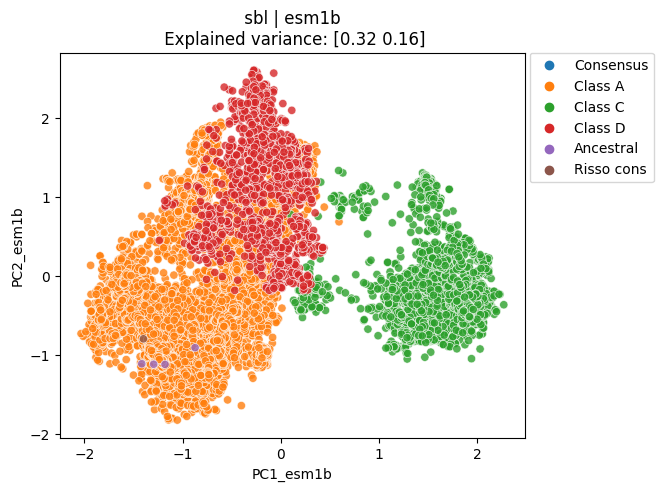

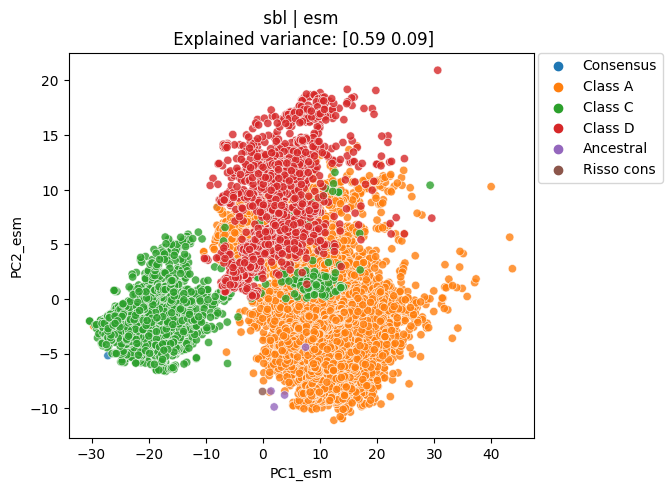

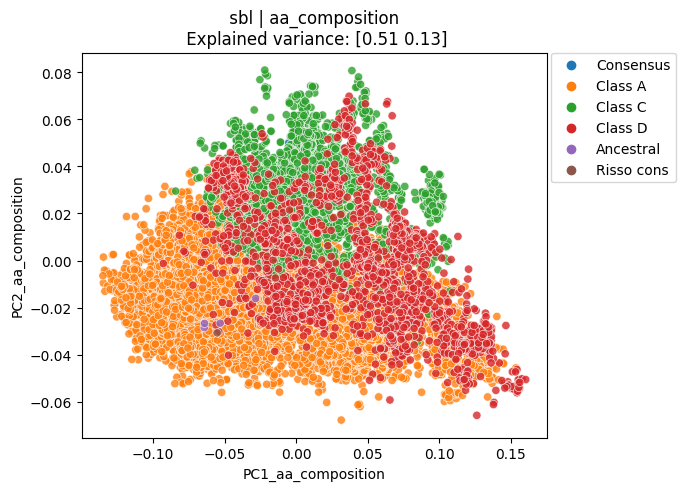

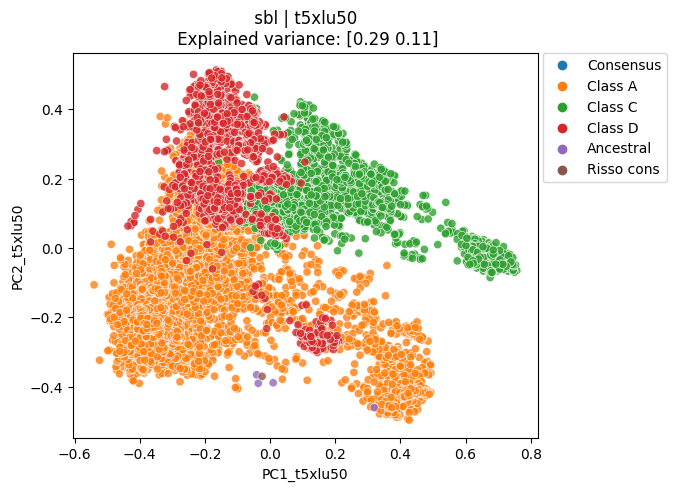

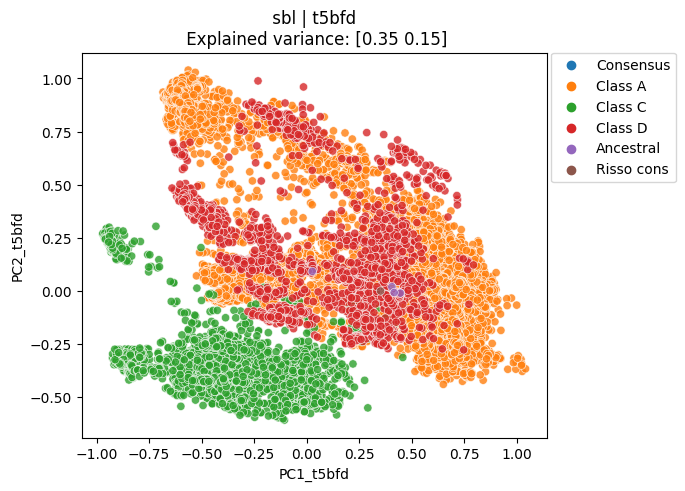

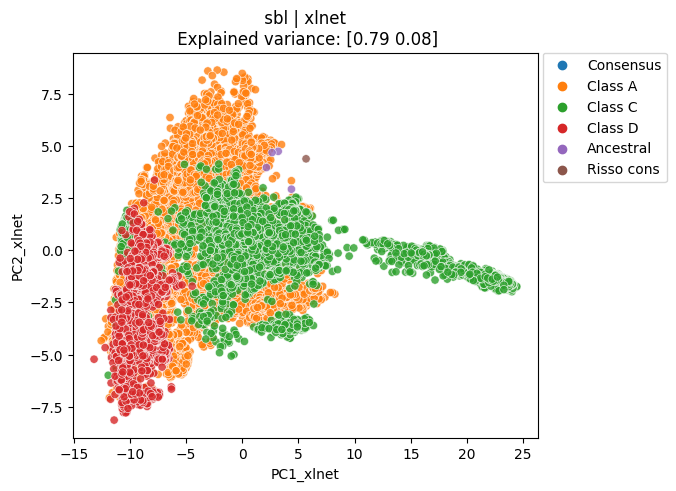

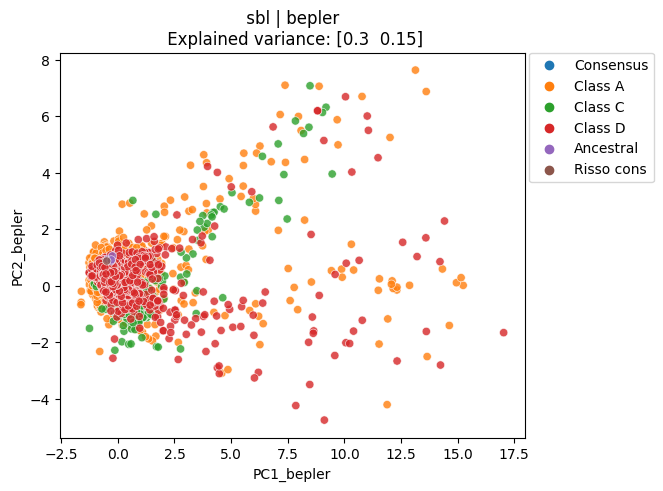

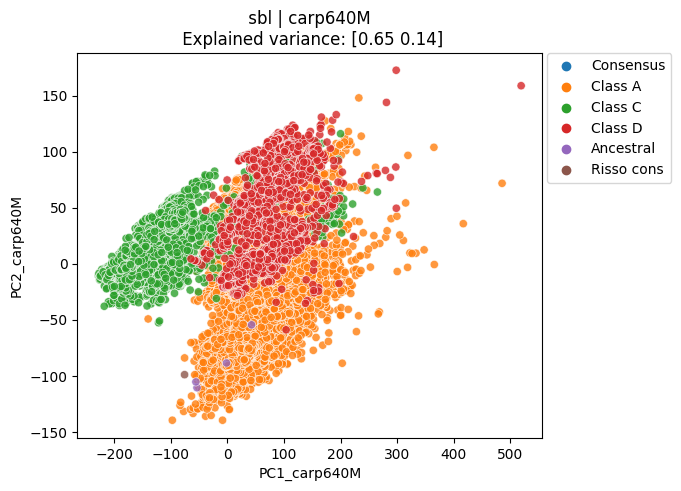

In [10]:
for ele in models:
    do_pca(ele, df_sbl, "sbl")

csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_esm1b.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_esm.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_aa_composition.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_t5xlu50.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_t5bfd.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_xlnet.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_bepler.csv
csv file saved as: ../results/dim_redo/splitted_classes/pca/pca_2d_mbl_carp640M.csv


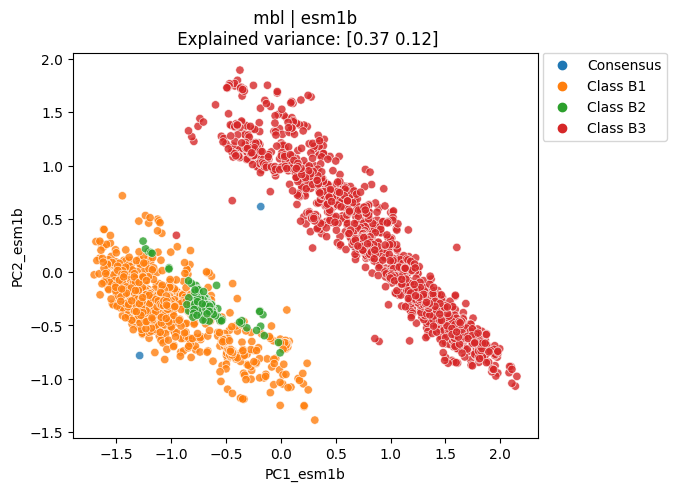

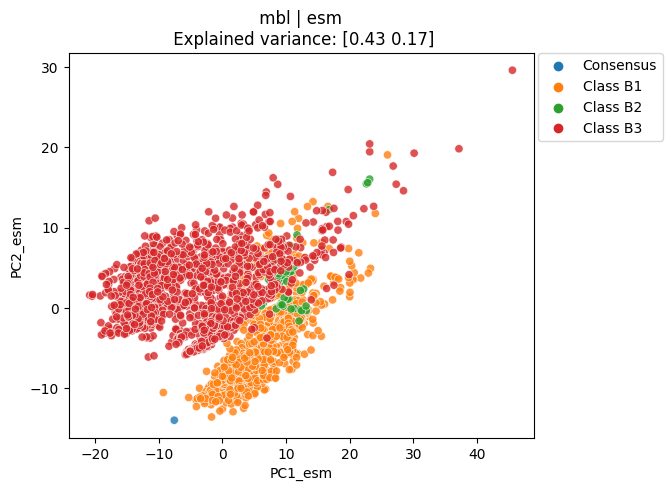

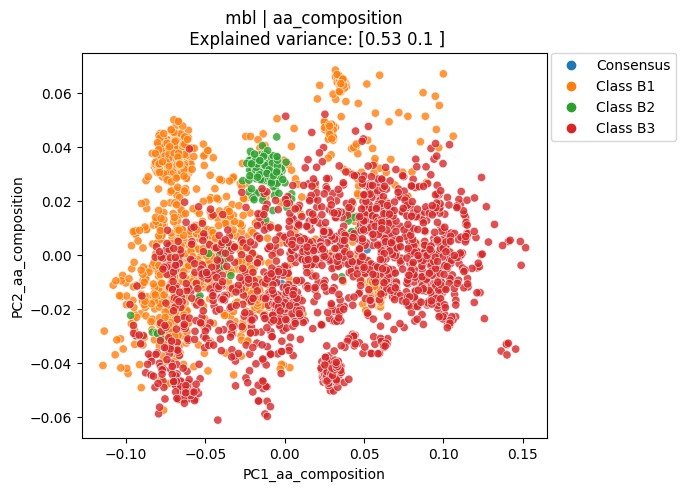

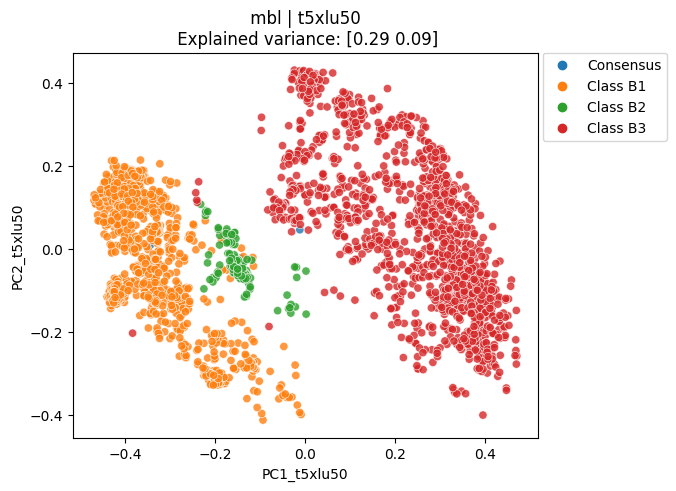

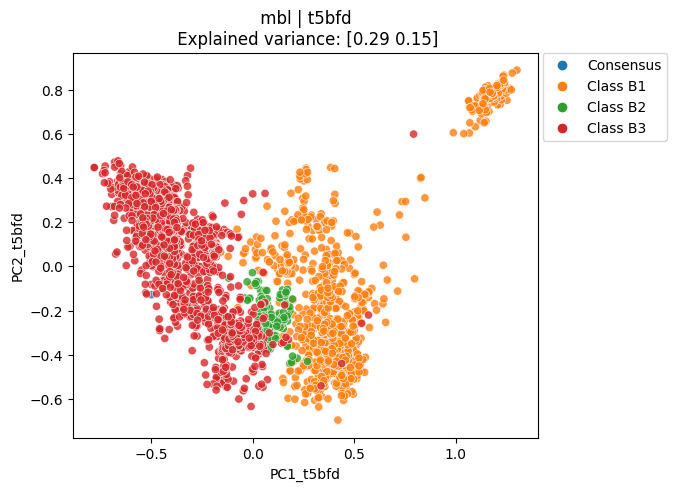

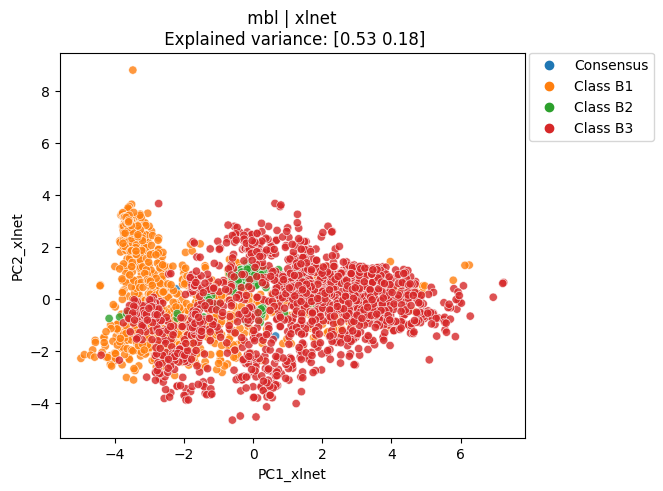

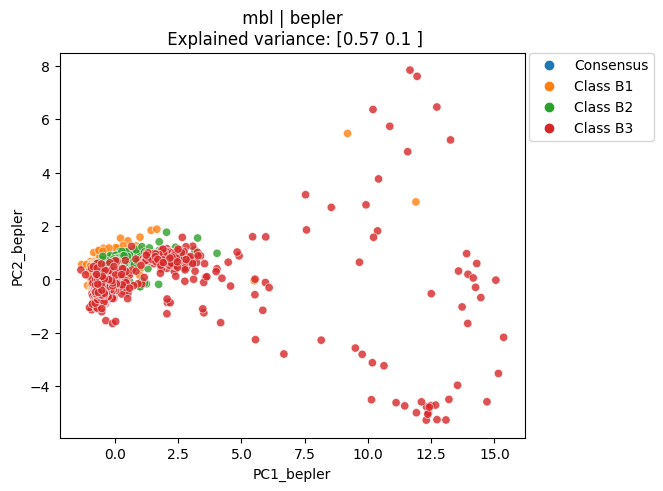

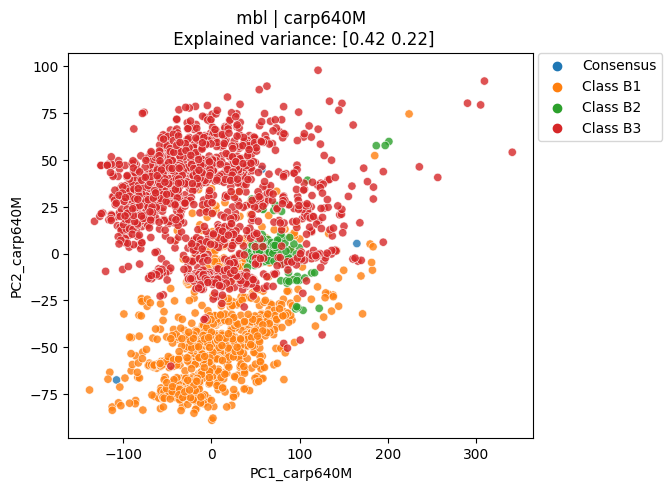

In [11]:
for ele in models:
    do_pca(ele, df_mbl, "mbl")

In [12]:
! ls ../results/dim_redo/splitted_classes/pca/

pca_2d_mbl_aa_composition.csv  pca_2d_sbl_aa_composition.csv
pca_2d_mbl_bepler.csv	       pca_2d_sbl_bepler.csv
pca_2d_mbl_carp640M.csv        pca_2d_sbl_carp640M.csv
pca_2d_mbl_esm.csv	       pca_2d_sbl_esm.csv
pca_2d_mbl_esm1b.csv	       pca_2d_sbl_esm1b.csv
pca_2d_mbl_t5bfd.csv	       pca_2d_sbl_t5bfd.csv
pca_2d_mbl_t5xlu50.csv	       pca_2d_sbl_t5xlu50.csv
pca_2d_mbl_xlnet.csv	       pca_2d_sbl_xlnet.csv


fin